## Exercise 6: PCA


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
df = pd.read_csv('data/fifa_20.csv')#Change path according to your files

### PCA

A common method for dimensionality reduction is the Principal Component Analysis, which is also known from the lecture:

https://en.wikipedia.org/wiki/Principal_component_analysis

Create scatter plots of the features 'Dribbling' and 'Ball control', then apply z-normalization to both features, and finally applying PCA to the normalized 2-d data (keep both dimensions after the transformation). 

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

What is the amount of variance explained by each of the selected components? 

What is the percentage of variance explained by the remining component, if we reduce the dimensionality of the 2-d dataset to 1-d with PCA?

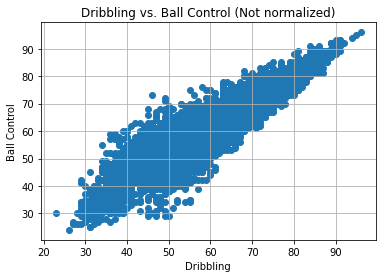

In [3]:
#TODO: make scatter plots of the original normalized and the transformed data

fig = plt.figure()
ax = plt.axes()
ax.scatter(df.dribbling, df.skill_ball_control)
ax.set(xlabel = "Dribbling", ylabel = "Ball Control", title = "Dribbling vs. Ball Control (Not normalized)")
ax.grid()


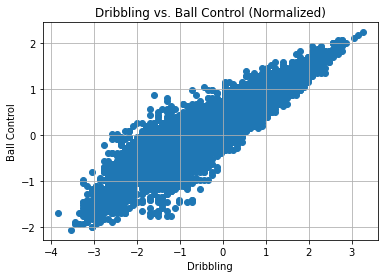

In [4]:
# Then we scale the data
dribbling_z = pd.DataFrame(scale(df[['dribbling']]))
ball_control_z = pd.DataFrame(scale(df[['skill_ball_control']]))
fig = plt.figure()
ax = plt.axes()
ax.scatter(dribbling_z, ball_control_z)
ax.set(xlabel = "Dribbling", ylabel = "Ball Control", title = "Dribbling vs. Ball Control (Normalized)")
ax.grid()

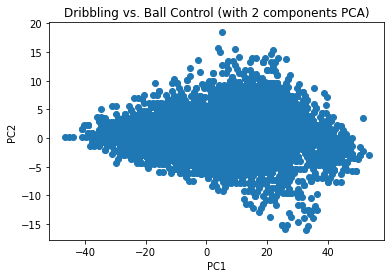

In [5]:
# Then we scale the data

joint = df[['dribbling','skill_ball_control']].dropna()
joint = np.stack((joint.dribbling, joint.skill_ball_control), axis=1)
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(joint)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Dribbling vs. Ball Control (with 2 components PCA)")
plt.show()


In [6]:
# TODO: output the amount of explained variance of each component and remining variance after dimensionality reduction
var_2 = pca.fit(joint).explained_variance_ratio_
print("The percentage of variance explained with 2 components is: ",var_2[0]," for PC1 and", var_2[1],"for PC2")

pca_1 = PCA(n_components=1)
print("The percentage of variance with 1 component explained by the remaining one is: ", 1-pca_1.fit(joint).explained_variance_ratio_[0])

The percentage of variance explained with 2 components is:  0.9605936984808559  for PC1 and 0.039406301519144205 for PC2
The percentage of variance with 1 component explained by the remaining one is:  0.03940630151901359
